In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-06-03 06:25:40--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.94MB/s    in 3m 45s  

2021-06-03 06:29:26 (1.37 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import os
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir(base_dir)

['paper', 'rock', 'scissors', 'README_rpc-cv-images.txt']

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    validation_split=0.4
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(100,150),
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 148, 16)       448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 49, 74, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 47, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 23, 36, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 10880)            

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=7,
    verbose=2)

Epoch 1/30
10/10 - 8s - loss: 0.2108 - accuracy: 0.9187 - val_loss: 0.1782 - val_accuracy: 0.9420
Epoch 2/30
10/10 - 8s - loss: 0.1406 - accuracy: 0.9500 - val_loss: 0.1338 - val_accuracy: 0.9420
Epoch 3/30
10/10 - 8s - loss: 0.1489 - accuracy: 0.9469 - val_loss: 0.0709 - val_accuracy: 0.9777
Epoch 4/30
10/10 - 8s - loss: 0.0861 - accuracy: 0.9625 - val_loss: 0.1200 - val_accuracy: 0.9688
Epoch 5/30
10/10 - 7s - loss: 0.1396 - accuracy: 0.9621 - val_loss: 0.1067 - val_accuracy: 0.9420
Epoch 6/30
10/10 - 8s - loss: 0.1116 - accuracy: 0.9656 - val_loss: 0.1164 - val_accuracy: 0.9598
Epoch 7/30
10/10 - 8s - loss: 0.1337 - accuracy: 0.9563 - val_loss: 0.1099 - val_accuracy: 0.9688
Epoch 8/30
10/10 - 8s - loss: 0.0976 - accuracy: 0.9625 - val_loss: 0.0950 - val_accuracy: 0.9643
Epoch 9/30
10/10 - 7s - loss: 0.1164 - accuracy: 0.9586 - val_loss: 0.1955 - val_accuracy: 0.9420
Epoch 10/30
10/10 - 8s - loss: 0.1664 - accuracy: 0.9438 - val_loss: 0.2500 - val_accuracy: 0.9286
Epoch 11/30
10/10 -

In [ ]:
test_loss, test_acc = model.evaluate(train_generator, verbose=2)


42/42 - 11s - loss: 0.0534 - accuracy: 0.9833


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Saving 3sQLj3fYBZhheJ7K.png to 3sQLj3fYBZhheJ7K.png
3sQLj3fYBZhheJ7K.png
BATU


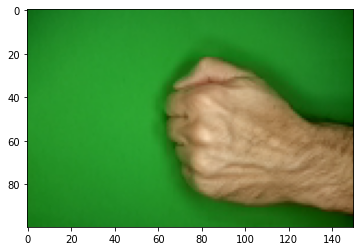

In [ ]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0]==1:
    print('KERTAS')
  elif classes[0][1]==1:
    print('BATU')
  elif classes[0][2]==1:
    print('GUNTING')
  else:
    print('TIDAK TERDETEKSI')